In [2]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('orders.csv', 'orders'),
    ('payments.csv', 'payments'),
    ('products.csv', 'products'),
    ('sellers.csv', 'sellers')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='host_name',
    user='username',
    password='password',
    database='database name'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/shivangikhanna/Desktop/ECommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector
import numpy as np

# 1. List all unique cities where customers are located.

In [5]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Manifest',
    database='ecommerce'
)
cursor = conn.cursor()

In [6]:
query = """ SELECT DISTINCT customer_city FROM customers """

cursor.execute(query)

data = cursor.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [8]:
query = """ SELECT COUNT(order_id) FROM orders WHERE year(order_purchase_timestamp) = 2017 """

cursor.execute(query)

data = cursor.fetchall()

data[0][0]

45101

# 3. Find the total sales per category.

In [10]:
query = """ 
SELECT UPPER(products.product_category) category, 
ROUND(SUM(payments.payment_value), 2) sales
FROM products JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

# 4. Calculate the percentage of orders that were paid in installments.

In [12]:
query = """ 
SELECT 100.0 * SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END)/COUNT(payment_installments) FROM payments
"""

cursor.execute(query)

data = cursor.fetchall()

data[0][0]

Decimal('49.41763')

# 5. Count the number of customers from each state. 

In [14]:
query = """ 
SELECT customer_state, COUNT(customer_id) FROM customers GROUP BY customer_state
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('SP', 41746),
 ('SC', 3637),
 ('MG', 11635),
 ('PR', 5045),
 ('RJ', 12852),
 ('RS', 5466),
 ('PA', 975),
 ('GO', 2020),
 ('ES', 2033),
 ('BA', 3380),
 ('MA', 747),
 ('MS', 715),
 ('CE', 1336),
 ('DF', 2140),
 ('RN', 485),
 ('PE', 1652),
 ('MT', 907),
 ('AM', 148),
 ('AP', 68),
 ('AL', 413),
 ('RO', 253),
 ('PB', 536),
 ('TO', 280),
 ('PI', 495),
 ('AC', 81),
 ('SE', 350),
 ('RR', 46)]

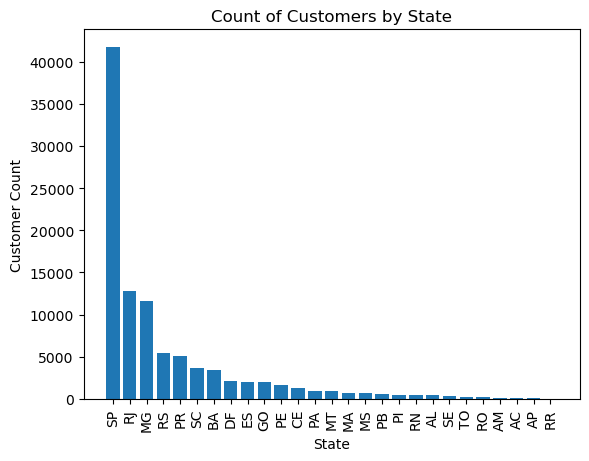

In [15]:
df = pd.DataFrame(data, columns=["State", "Customer_count"])
df = df.sort_values(by="Customer_count", ascending=False)
plt.bar(df["State"], df["Customer_count"])
plt.xlabel("State")
plt.ylabel("Customer Count")
plt.title("Count of Customers by State")
plt.xticks(rotation=90)
plt.show()

# 6. Calculate the number of orders per month in 2018.

In [17]:
query = """ 
SELECT monthname(order_purchase_timestamp) month, COUNT(order_id) 
FROM orders 
WHERE year(order_purchase_timestamp) = 2018
GROUP BY month 
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

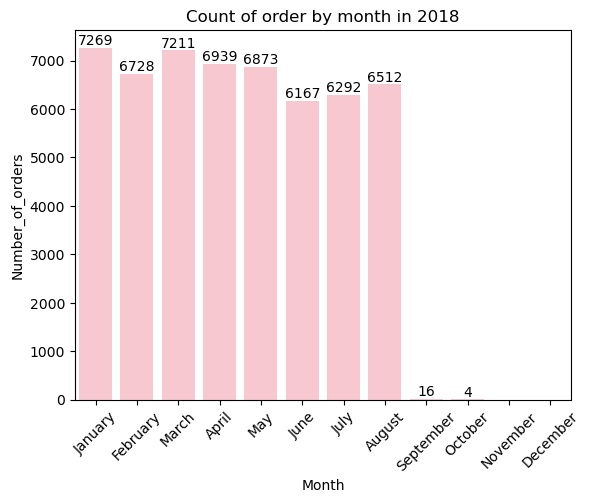

In [18]:
df = pd.DataFrame(data, columns=["Month", "Number_of_orders"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

ax = sns.barplot(x=df["Month"], y=df["Number_of_orders"], data=df, order = o, color = "pink")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of order by month in 2018")
plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [20]:
query = """ 
WITH count_per_order AS (
SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS oc
FROM order_items JOIN orders ON order_items.order_id = orders.order_id
GROUP BY orders.order_id, orders.customer_id
)
SELECT customers.customer_city, ROUND(AVG(count_per_order.oc),2) AS average_products_per_order
FROM count_per_order
JOIN customers ON count_per_order.customer_id = customers.customer_id
GROUP BY customers.customer_city
ORDER BY average_products_per_order DESC
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('padre carvalho', Decimal('7.00')),
 ('celso ramos', Decimal('6.50')),
 ('datas', Decimal('6.00')),
 ('candido godoi', Decimal('6.00')),
 ('matias olimpio', Decimal('5.00')),
 ('cidelandia', Decimal('4.00')),
 ('picarra', Decimal('4.00')),
 ('morro de sao paulo', Decimal('4.00')),
 ('teixeira soares', Decimal('4.00')),
 ('curralinho', Decimal('4.00')),
 ('inconfidentes', Decimal('3.50')),
 ('ipua', Decimal('3.25')),
 ('alto paraiso de goias', Decimal('3.00')),
 ('nova esperanca do sul', Decimal('3.00')),
 ('capela', Decimal('3.00')),
 ('ouvidor', Decimal('3.00')),
 ('pacuja', Decimal('3.00')),
 ('brasileia', Decimal('3.00')),
 ('ubata', Decimal('3.00')),
 ('pedregulho', Decimal('3.00')),
 ('jose boiteux', Decimal('3.00')),
 ('chapadao do lageado', Decimal('3.00')),
 ('buriti', Decimal('3.00')),
 ('ubajara', Decimal('2.67')),
 ('colonia castrolanda', Decimal('2.67')),
 ('maracana', Decimal('2.50')),
 ('sao miguel dos campos', Decimal('2.50')),
 ('colonia jordaozinho', Decimal('2.50'))

# 8. Calculate the percentage of total revenue contributed by each product category.

In [22]:
query = """ 
SELECT 
UPPER(products.product_category), 
ROUND((100 * SUM(payments.payment_value))/(SELECT SUM(payment_value) AS total_revenue FROM payments), 2) AS sales_percentage
FROM payments JOIN order_items ON payments.order_id = order_items.order_id
JOIN products ON order_items.product_id = products.product_id
GROUP BY products.product_category
ORDER BY sales_percentage DESC
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('BED TABLE BATH', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('COMPUTER ACCESSORIES', 9.9),
 ('FURNITURE DECORATION', 8.93),
 ('WATCHES PRESENT', 8.93),
 ('SPORT LEISURE', 8.7),
 ('HOUSEWARES', 6.84),
 ('AUTOMOTIVE', 5.32),
 ('GARDEN TOOLS', 5.24),
 ('COOL STUFF', 4.87),
 ('FURNITURE OFFICE', 4.04),
 ('TOYS', 3.87),
 ('BABIES', 3.37),
 ('PERFUMERY', 3.17),
 ('TELEPHONY', 3.04),
 ('STATIONARY STORE', 1.98),
 ('PET SHOP', 1.94),
 ('PCS', 1.74),
 ('ELECTRONICS', 1.62),
 (None, 1.58),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1.51),
 ('MUSICAL INSTRUMENTS', 1.46),
 ('ELECTROSTILE', 1.41),
 ('FASHION BAGS AND ACCESSORIES', 1.36),
 ('FIXED TELEPHONY', 1.29),
 ('GAMES CONSOLES', 1.22),
 ('BAGS ACCESSORIES', 1.17),
 ('CASA CONSTRUCAO', 0.85),
 ('ROOM FURNITURE', 0.85),
 ('ELECTRICES 2', 0.78),
 ('AGRO INDUSTRIA E COMERCIO', 0.74),
 ('HOME APPLIANCES', 0.6),
 ('CLIMATIZATION', 0.57),
 ('HOUSE COMFORT', 0.53),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 0.47),
 ('DRINKS', 0.45),
 ('CONSTRUCTION T

# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [24]:
query = """ 
SELECT 
order_items.product_id, 
COUNT(order_items.product_id),
ROUND(AVG(order_items.price),2)
FROM order_items 
GROUP BY order_items.product_id
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('4244733e06e7ecb4970a6e2683c13e61', 9, 59.23),
 ('e5f2d52b802189ee658865ca93d83a8f', 1, 239.9),
 ('c777355d18b72b67abbeef9df44fd0fd', 3, 199.0),
 ('7634da152a4610f1595efa32f14722fc', 2, 12.99),
 ('ac6c3623068f30de03045865e4e10089', 12, 202.4),
 ('ef92defde845ab8450f9d70c526ef70f', 5, 21.9),
 ('8d4f2bb7e93e6710a28f34fa83ee7d28', 3, 18.57),
 ('557d850972a7d6f792fd18ae1400d9b6', 1, 810.0),
 ('310ae3c140ff94b03219ad0adc3c778f', 2, 145.95),
 ('4535b0e1091c278dfd193e5a1d63b39f', 4, 53.99),
 ('d63c1011f49d98b976c352955b1c4bea', 55, 59.26),
 ('f177554ea93259a5b282f24e33f65ab6', 3, 45.0),
 ('99a4788cb24856965c36a24e339b6058', 488, 88.17),
 ('368c6c730842d78016ad823897a372db', 388, 54.27),
 ('8cab8abac59158715e0d70a36c807415', 2, 99.9),
 ('3f27ac8e699df3d300ec4a5d8c5cf0b2', 1, 639.0),
 ('4fa33915031a8cde03dd0d3e8fb27f01', 20, 148.9),
 ('b50c950aba0dcead2c48032a690ce817', 4, 99.0),
 ('5ed9eaf534f6936b51d0b6c5e4d5c2e9', 21, 24.98),
 ('553e0e7590d3116a072507a3635d2877', 39, 46.48),
 ('57d79905de0

In [25]:
df = pd.DataFrame(data, columns=["Product_id", "Number of items", "Average price"])

arr = df["Number of items"]
arr2 = df["Average price"]

np.corrcoef([arr, arr2])

array([[ 1.        , -0.03213985],
       [-0.03213985,  1.        ]])

The correlation is not that strong. This means the price does not impact the number of times a product is purchased.

# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

In [28]:
query = """ 
SELECT 
order_items.seller_id, 
ROUND(SUM(payments.payment_value),2) AS revenue,
DENSE_RANK() OVER (ORDER BY ROUND(SUM(payments.payment_value),2) DESC)
FROM order_items JOIN payments ON order_items.order_id = payments.order_id
GROUP BY order_items.seller_id
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('7c67e1448b00f6e969d365cea6b010ab', 507166.91, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.04, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.27, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.08, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.32, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.12, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.3, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.23, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.21, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.75, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.8, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.74, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.34, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04, 16),
 ('620c87c171fb2a6dd6e8bb4dec959fc6', 145267.95, 17),
 ('cc419e0650a3c5ba77189a1882b7556a', 141309.58, 18),
 ('5dceca129747e92ff8ef7a997dc4f8ca', 1

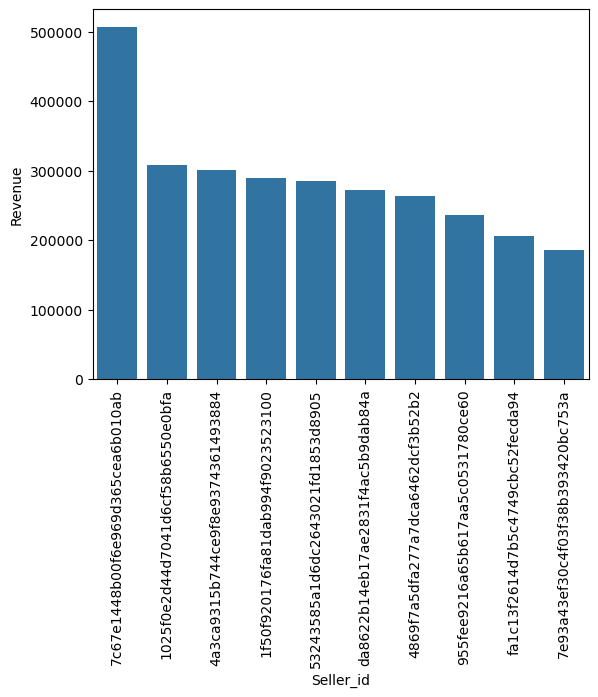

In [29]:
df = pd.DataFrame(data, columns=["Seller_id", "Revenue", "Rank"])
sns.barplot(x = "Seller_id", y = "Revenue", data = df.head(10))
plt.xticks(rotation = 90)
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.

In [31]:
query = """ 
SELECT 
customer_id, 
order_purchase_timestamp, 
payment,
AVG(payment) OVER (PARTITION BY customer_id ORDER BY order_purchase_timestamp ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_average 
FROM (
SELECT 
orders.customer_id,
orders.order_purchase_timestamp,
payments.payment_value AS payment
FROM payments JOIN orders ON payments.order_id = orders.order_id
) AS a
"""

cursor.execute(query)

data = cursor.fetchall()

data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35,
  179.35000610351562),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01,
  107.01000213623047),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:12',
  71.8,
  71.80000305175781),
 ('000419c5494106c306a97b5635748086',
  '2018-03-02 17:47:40',
  49.4,
  49.400001525878906),
 ('00046a560d407e99b969756e0b10f282',
  '2017-12-18 11:08:30',
  166.59,
  166.58999633789062),
 ('00050bf6e01e69d5c0fd612f1bcfb69c',
  '2017-09-17 16:04:44',
  85.23,
  85.2300033569336),
 ('000598caf2ef4117407665ac33275130',
  '2018-08-11 12:14:35',
  1255.71,
  1255.7099609375),
 ('0005aefbb696d34b3424dccd0a0e9fd0',
  '2018-06-20 0

In [32]:
df = pd.DataFrame(data, columns=["customer_id", "order_time", "payment", "moving_average"])
df.head()

,customer_id,order_time,payment,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


# 12. Calculate the cumulative sales per month for each year.

In [34]:
query = """ 
SELECT years,
months, 
payment,
ROUND(SUM(payment) OVER (ORDER BY years, months), 2) AS cumulative_sales
FROM
(SELECT 
YEAR(orders.order_purchase_timestamp) AS years,
MONTH(orders.order_purchase_timestamp) AS months,
ROUND(SUM(payments.payment_value), 2) AS payment
FROM orders JOIN payments ON orders.order_id = payments.order_id
GROUP BY years, months
ORDER BY years, months) AS a
"""

cursor.execute(query)

data = cursor.fetchall()

data

[(2016, 9, 252.24, 252.24),
 (2016, 10, 59090.48, 59342.72),
 (2016, 12, 19.62, 59362.34),
 (2017, 1, 138488.04, 197850.38),
 (2017, 2, 291908.01, 489758.39),
 (2017, 3, 449863.6, 939621.99),
 (2017, 4, 417788.03, 1357410.02),
 (2017, 5, 592918.82, 1950328.84),
 (2017, 6, 511276.38, 2461605.22),
 (2017, 7, 592382.92, 3053988.14),
 (2017, 8, 674396.32, 3728384.46),
 (2017, 9, 727762.45, 4456146.91),
 (2017, 10, 779677.88, 5235824.79),
 (2017, 11, 1194882.8, 6430707.59),
 (2017, 12, 878401.48, 7309109.07),
 (2018, 1, 1115004.18, 8424113.25),
 (2018, 2, 992463.34, 9416576.59),
 (2018, 3, 1159652.12, 10576228.71),
 (2018, 4, 1160785.48, 11737014.19),
 (2018, 5, 1153982.15, 12890996.34),
 (2018, 6, 1023880.5, 13914876.84),
 (2018, 7, 1066540.75, 14981417.59),
 (2018, 8, 1022425.32, 16003842.91),
 (2018, 9, 4439.54, 16008282.45),
 (2018, 10, 589.67, 16008872.12)]

In [35]:
df = pd.DataFrame(data, columns=["Year", "Month", "payment", "Cumulative Sales"])
df.head()

,Year,Month,payment,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


# 13. Calculate the year-over-year growth rate of total sales.

In [37]:
query = """ 
SELECT 
years,
ROUND(((payment-LAG(payment, 1) OVER (ORDER BY years))/LAG(payment, 1) OVER (ORDER BY years)) * 100.0, 2) AS growth_rate
FROM
(SELECT 
YEAR(orders.order_purchase_timestamp) AS years,
ROUND(SUM(payments.payment_value), 2) AS payment
FROM orders JOIN payments ON orders.order_id = payments.order_id
GROUP BY years
ORDER BY years) AS a
"""

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns=["Year", "YoY Growth %"])
df

,Year,YoY Growth %
0,2016,NaN
1,2017,12112.7
2,2018,20.0


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [39]:
query = """ 
WITH a AS (
SELECT 
customers.customer_id,
MIN(orders.order_purchase_timestamp) AS first_order_date
FROM customers JOIN orders ON customers.customer_id = orders.customer_id
GROUP BY customers.customer_id
),
b AS (
SELECT a.customer_id, COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order_date
FROM a join orders ON a.customer_id = orders.customer_id
WHERE 
orders.order_purchase_timestamp > first_order_date
AND 
orders.order_purchase_timestamp < date_add(first_order_date, INTERVAL 6 MONTH)
GROUP BY a.customer_id
)
SELECT 100.0 * (COUNT(DISTINCT a.customer_id))/COUNT(DISTINCT b.customer_id)
FROM a LEFT JOIN b ON a.customer_id = b.customer_id
"""

cursor.execute(query)

data = cursor.fetchall()

data

[(None,)]

This means the retention rate is 0. None of the customers are repeated

# 15. Identify the top 3 customers who spent the most money in each year.

In [42]:
query = """ 
SELECT years, customer_id, payment, d_rank FROM
(SELECT
YEAR(orders.order_purchase_timestamp) years,
orders.customer_id,
SUM(payments.payment_value) AS payment,
DENSE_RANK() OVER (PARTITION BY YEAR(orders.order_purchase_timestamp) ORDER BY SUM(payments.payment_value) DESC) AS d_rank
FROM
orders JOIN payments ON orders.order_id = payments.order_id
GROUP BY YEAR(orders.order_purchase_timestamp), orders.customer_id) AS a
WHERE d_rank <= 3
"""

cursor.execute(query)

data = cursor.fetchall()

data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.080078125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31005859375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66015625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.8798828125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.2099609375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.43994140625, 3)]

In [43]:
df = pd.DataFrame(data, columns=["Year", "Customer_id", "Payment", "Yearly Rank"])
df

,Year,Customer_id,Payment,Yearly Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


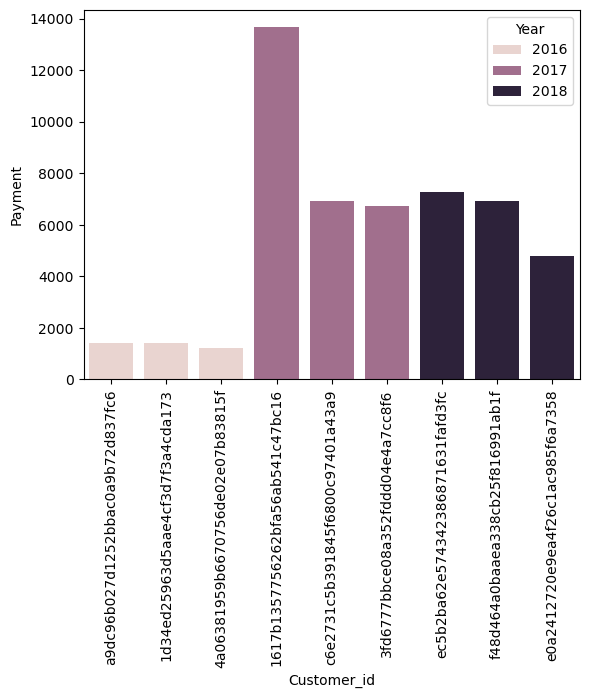

In [44]:
sns.barplot(x="Customer_id", y="Payment", data=df, hue="Year")
plt.xticks(rotation=90)
plt.show()